In [ ]:
#%load_ext lab_black

# Analisando Artigos da coleção SciELO Brasil que não possuem DOI registrados

Para realizar este experimento, utilizei três fontes primárias de dados, os PIDs extraídos da base MST, o site http://doi.org e o serviço http://articlemeta.scielo.org/. Foram construídos dois scripts `python` para extrair os pids do Articlemeta e para acessar o doi.org.

Para criar a análise nós vamos seguir os passos:
1. Encontrar todos os DOI dos  artigos via ArticleMeta
2. Acessar todos os DOI encontrados via ArticleMeta
    1. Para os documentos que não possuem DOI no ArticleMeta produzimos um doi sintético (prefixo + PID)


Os pontos a seguir indicam as situações que podemos nos deparar quando acessamos o DOI registrado no ArticleMeta ou o DOI sintético: 

1. *O artigo possui DOI mas no ArticleMeta não está populado.*
2. O Artigo não possui DOI e no ArticleMeta não está populado (é preciso garantir que ele não possui DOI).
3. O artigo não possui DOI no ArticleMeta e no site MAS possui na API do Crossref.
4. *O artigo possui DOI no ArticleMeta mas não está registrado no crossref.*
5. O Artigo possui DOI no ArticleMeta e está acessível no http://doi.org e no http://www.scielo.br

Todos os pontos acima são importantes, contudo os pontos **1**, **4** serão considerados mais importantes nesta fase de investigação.

Para iniciar a análise foi construído um script para extrair os DOIs do Articlemeta a partir de uma lista de PIDs (scielo pid v2).

Para executar o script digite `python scripts/extract_doi.py`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ARTICLE_META_COLUMNS = ["pid", "doi", "found", "collection", "error"]

In [3]:
ARTICLE_META_DATA = pd.read_csv(
    "resultados/articlemeta.csv", sep=";", names=ARTICLE_META_COLUMNS
)

In [4]:
ARTICLE_META_DATA.head()

,pid,doi,found,collection,error
0,S0104-66322008000100001,10.1590/S0104-66322008000100001,1,scl,NaN
1,S0102-311X2005000100026,10.1590/S0102-311X2005000100026,1,scl,NaN
2,S0102-311X2005000100027,10.1590/S0102-311X2005000100027,1,scl,NaN
3,S0104-66322007000400005,10.1590/S0104-66322007000400005,1,scl,NaN
4,S0104-66322007000400008,10.1590/S0104-66322007000400008,1,scl,NaN


In [5]:
articles_without_registered_doi = ARTICLE_META_DATA[ARTICLE_META_DATA["found"] == 0]

In [6]:
#ARTICLE_META_DATA["label"] = ARTICLE_META_DATA.apply(
#    lambda row: "Com doi" if row["found"] == 1 else "Sem doi", axis=1
#)

In [7]:
ARTICLE_META_DATA[ARTICLE_META_DATA["found"] == 0].shape # Artigos sem DOI no ArticleMeta

(3676, 5)

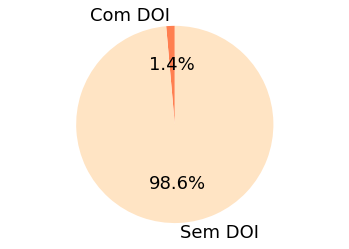

In [8]:
labels = ("Com DOI", "Sem DOI")
data = ARTICLE_META_DATA.groupby("found", as_index=True)["pid"].count()

fig1, ax1 = plt.subplots()
ax1.pie(
    data,
    labels=labels,
    autopct="%1.1f%%",
    colors=("coral", "bisque"),
    startangle=90,
    textprops={'fontsize': 18}
)
ax1.axis("equal")

plt.show()

A princípio os dados extraídos do Articlemeta indicam que `1.4%` dos artigos não possuem DOI atribuídos. A consequeência desta informação é a não disponibilidade do dado para as ferramentas que utilizam do ArticleMeta como fonte.

In [9]:
doi_df = pd.read_csv("resultados/doi-part.csv", delimiter=";", names=["pid", "doi", "found_by_doi", "found_by_generic_doi", "url", "error"])
doi_df.head()

,pid,doi,found_by_doi,found_by_generic_doi,url,error
0,S0034-70942011000300002,10.1590/S0034-70942011000300002,1,0,http://www.scielo.br/scielo.php?script=sci_art...,NaN
1,S1809-48722011000300020,10.1590/S1809-48722011000300020,1,0,http://www.scielo.br/scielo.php?script=sci_art...,NaN
2,S0100-879X2007001000010,10.1590/S0100-879X2006005000161,1,0,http://www.scielo.br/scielo.php?script=sci_art...,NaN
3,S0074-02761995000500001,10.1590/S0074-02761995000500001,1,0,http://www.scielo.br/scielo.php?script=sci_art...,NaN
4,S0100-879X2009001000017,10.1590/S0100-879X2009005000017,1,0,http://www.scielo.br/scielo.php?script=sci_art...,NaN


In [10]:
# Artigos que não possuem DOI no ArticleMeta mas
# que conseguimos confirmar o seu prefixo/PID no http://doi.org
doi_df[doi_df["found_by_generic_doi"]==1].shape 

(1075, 6)

In [11]:
doi_df[doi_df["found_by_generic_doi"]==1].head()

,pid,doi,found_by_doi,found_by_generic_doi,url,error
14,S1413-73722013000200017,10.1590/S1413-73722013000200017,0,1,http://www.scielo.br/scielo.php?script=sci_art...,NaN
95,S1413-73722011000100004,10.1590/S1413-73722011000100004,0,1,http://www.scielo.br/scielo.php?script=sci_art...,NaN
124,S1413-73722011000100003,10.1590/S1413-73722011000100003,0,1,http://www.scielo.br/scielo.php?script=sci_art...,NaN
133,S1413-73722011000100005,10.1590/S1413-73722011000100005,0,1,http://www.scielo.br/scielo.php?script=sci_art...,NaN
154,S1413-73722011000100006,10.1590/S1413-73722011000100006,0,1,http://www.scielo.br/scielo.php?script=sci_art...,NaN


In [12]:
# Exemplo de documento sem DOI no ArticleMeta
ARTICLE_META_DATA[ARTICLE_META_DATA["pid"] == "S1413-73722013000200017"]

,pid,doi,found,collection,error
56408,S1413-73722013000200017,NaN,0,scl,'doi'
